#### 随着训练样本的逐渐增多，算法训练出的模型的表现能⼒

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
x = np.linspace(-4, 4, 100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + np.random.normal(0, 1, 100)

In [9]:
def plot_learning_curve(argo, X_train, X_test, y_train, y_test):
    m = X_train.shape[0]
    train_score = []
    test_score = []
    
    for i in range(1, m+1):
        argo.fit(X_train[:i], y_train[:i])
        train_score.append(mean_squared_error(y_train[:i], argo.predict(X_train[:i])))
        test_score.append(mean_squared_error(y_test, argo.predict(X_test)))
        
    plt.plot([i for i in range(1, m+1)], np.sqrt(train_score), label="train_score")
    plt.plot([i for i in range(1, m+1)], np.sqrt(test_score), label="test_score")
    plt.axis([0, 70, 0, 5])
    plt.legend()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [11]:
def polynomialRegression(degree):
    return Pipeline([('poly', PolynomialFeatures(degree)), 
                     ('stand', StandardScaler()),
                     ('linear', LinearRegression())])

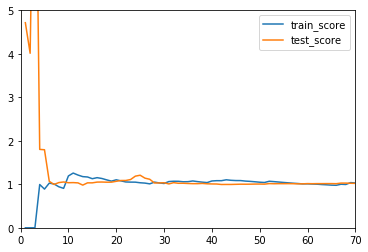

In [12]:
poly2 = polynomialRegression(2)
plot_learning_curve(poly2, X_train, X_test, y_train, y_test)

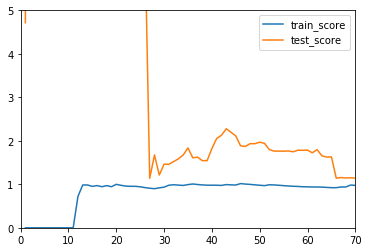

In [13]:
poly10 = polynomialRegression(10)
plot_learning_curve(poly10, X_train, X_test, y_train, y_test)

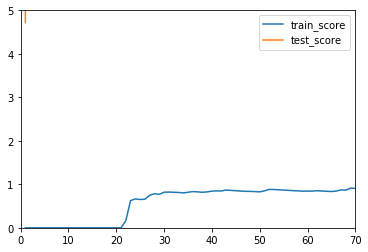

In [14]:
poly20 = polynomialRegression(20)
plot_learning_curve(poly20, X_train, X_test, y_train, y_test)